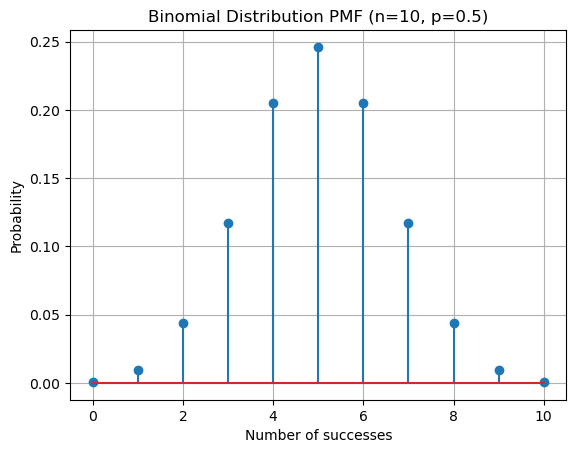

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success

# Range of possible outcomes (0 to n)
x = np.arange(0, n + 1)

# Compute the PMF values for each possible outcome
pmf_values = binom.pmf(x, n, p)

# Plot the PMF (without the `use_line_collection` argument)
plt.stem(x, pmf_values)
plt.title('Binomial Distribution PMF (n=10, p=0.5)')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


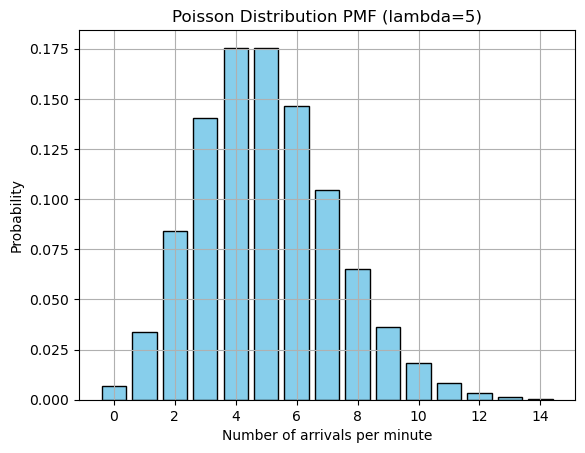

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters for the Poisson distribution
lambda_ = 5  # Average number of arrivals per minute

# Range of possible outcomes (e.g., number of arrivals)
x = np.arange(0, 15)  # Number of arrivals (0 to 14)

# Compute the PMF values for each possible number of arrivals using the Poisson distribution
pmf_values = poisson.pmf(x, lambda_)

# Plot the Poisson distribution PMF
plt.bar(x, pmf_values, color='skyblue', edgecolor='black')
plt.title(f'Poisson Distribution PMF (lambda={lambda_})')
plt.xlabel('Number of arrivals per minute')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


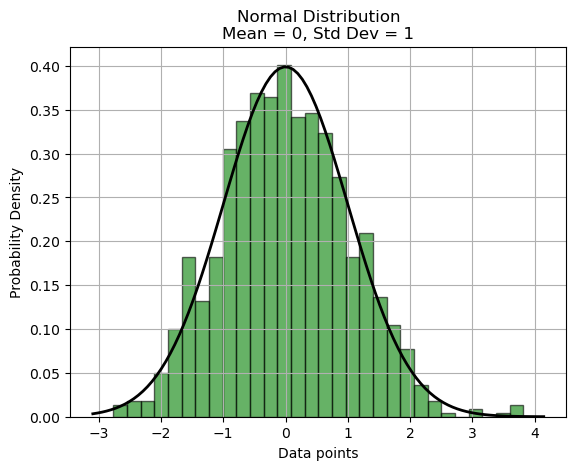

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mean = 0      # Mean of the distribution
std_dev = 1   # Standard deviation of the distribution
num_samples = 1000  # Number of random samples to generate

# Generate random data from a normal distribution
data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

# Plot the histogram of the random data to visualize the distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the probability density function (PDF) of the normal distribution
xmin, xmax = plt.xlim()  # Get the limits of the x-axis
x = np.linspace(xmin, xmax, 100)  # Generate x values for plotting the PDF
p = norm.pdf(x, mean, std_dev)  # Calculate the PDF values for each x
plt.plot(x, p, 'k', linewidth=2)  # Plot the normal distribution curve

# Add titles and labels
plt.title(f'Normal Distribution\nMean = {mean}, Std Dev = {std_dev}')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

# Show the plot
plt.grid(True)
plt.show()


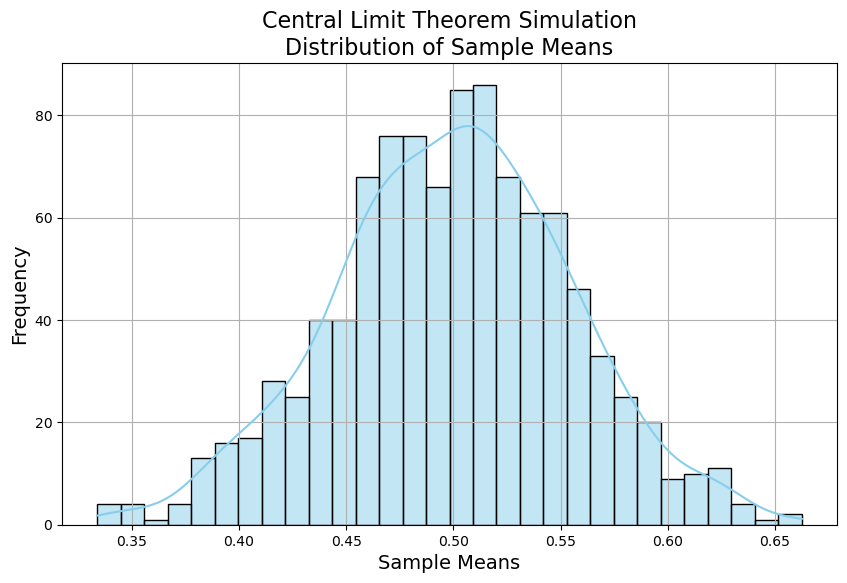

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters for the simulation
sample_size = 30      # Size of each sample
num_samples = 1000    # Number of samples to generate
distribution_type = 'uniform'  # Choose 'uniform' or 'exponential' or any other distribution

# Generate sample means
sample_means = []

for _ in range(num_samples):
    if distribution_type == 'uniform':
        # Generate a sample of uniform distribution (from 0 to 1)
        sample = np.random.uniform(0, 1, sample_size)
    elif distribution_type == 'exponential':
        # Generate a sample of exponential distribution
        sample = np.random.exponential(scale=1, size=sample_size)
    else:
        raise ValueError("Unsupported distribution type")

    # Calculate the mean of the sample and append it
    sample_means.append(np.mean(sample))

# Convert the sample means to a numpy array for easier handling
sample_means = np.array(sample_means)

# Plot the distribution of sample means using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Central Limit Theorem Simulation\nDistribution of Sample Means', fontsize=16)
plt.xlabel('Sample Means', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()


In [7]:
import numpy as np
from scipy.stats import ttest_ind

# Simulating sales data for Store A and Store B (in arbitrary units)
np.random.seed(0)  # For reproducibility
store_a_sales = np.random.normal(loc=200, scale=30, size=50)  # Store A: mean=200, std=30, n=50
store_b_sales = np.random.normal(loc=210, scale=30, size=50)  # Store B: mean=210, std=30, n=50

# Perform an independent t-test to compare the means of Store A and Store B
t_stat, p_value = ttest_ind(store_a_sales, store_b_sales)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05  # significance level (5%)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the average sales of Store A and Store B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the average sales of Store A and Store B.")


T-statistic: -0.84658916948643
P-value: 0.3992867374655039
Fail to reject the null hypothesis: There is no significant difference between the average sales of Store A and Store B.


In [8]:
import numpy as np
from scipy.stats import ttest_ind, ttest_rel

# Simulating data for two groups (for both independent and paired samples)
np.random.seed(0)
group_a = np.random.normal(loc=100, scale=15, size=50)  # Group A: mean=100, std=15
group_b = np.random.normal(loc=105, scale=15, size=50)  # Group B: mean=105, std=15

# Two-sample independent t-test (two-tailed)
t_stat_indep, p_value_indep = ttest_ind(group_a, group_b)
print("Independent t-test (two-tailed):")
print(f"T-statistic: {t_stat_indep}, P-value (two-tailed): {p_value_indep}")

# One-tailed independent t-test
# For one-tailed, we divide the two-tailed p-value by 2, depending on the direction of the hypothesis
alpha = 0.05
if t_stat_indep > 0:
    p_value_one_tailed_indep = p_value_indep / 2
    print(f"One-tailed independent t-test (p > 0): P-value (one-tailed): {p_value_one_tailed_indep}")
else:
    p_value_one_tailed_indep = 1 - p_value_indep / 2
    print(f"One-tailed independent t-test (p < 0): P-value (one-tailed): {p_value_one_tailed_indep}")

# Two-sample paired t-test (two-tailed)
t_stat_rel, p_value_rel = ttest_rel(group_a, group_b)
print("\nPaired t-test (two-tailed):")
print(f"T-statistic: {t_stat_rel}, P-value (two-tailed): {p_value_rel}")

# One-tailed paired t-test
# For one-tailed, we divide the two-tailed p-value by 2, depending on the direction of the hypothesis
if t_stat_rel > 0:
    p_value_one_tailed_rel = p_value_rel / 2
    print(f"One-tailed paired t-test (p > 0): P-value (one-tailed): {p_value_one_tailed_rel}")
else:
    p_value_one_tailed_rel = 1 - p_value_rel / 2
    print(f"One-tailed paired t-test (p < 0): P-value (one-tailed): {p_value_one_tailed_rel}")


Independent t-test (two-tailed):
T-statistic: -0.84658916948643, P-value (two-tailed): 0.3992867374655039
One-tailed independent t-test (p < 0): P-value (one-tailed): 0.8003566312672481

Paired t-test (two-tailed):
T-statistic: -0.823359616128214, P-value (two-tailed): 0.41429294327227884
One-tailed paired t-test (p < 0): P-value (one-tailed): 0.7928535283638606


In [10]:
import numpy as np
import scipy.stats as stats

# Parameters for the dataset and hypothesis testing
np.random.seed(0)  # For reproducibility
population_mean = 50  # The population mean we're testing against (μ₀)
population_std = 10  # The population standard deviation (σ)
sample_size = 1000  # Large sample size
alpha = 0.05  # Significance level (5%)

# Generate a sample dataset (random data from a normal distribution)
sample_data = np.random.normal(loc=52, scale=population_std, size=sample_size)  # Mean = 52, std = 10

# Sample mean (X̄) and standard deviation (σ) of the sample data
sample_mean = np.mean(sample_data)

# Calculate the z-score for the hypothesis test
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Calculate the two-tailed p-value from the z-score
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

# Print results
print(f"Sample Mean (X̄): {sample_mean:.2f}")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis Testing: Interpretation of the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the sample mean and the population mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the sample mean and the population mean.")


Sample Mean (X̄): 51.55
Z-score: 4.8934
P-value: 0.0000
Reject the null hypothesis: There is a significant difference between the sample mean and the population mean.


In [11]:
import numpy as np
from scipy import stats

# Parameters for the small sample dataset and hypothesis testing
np.random.seed(0)  # For reproducibility
population_mean = 50  # The population mean we're testing against (μ₀)
sample_size = 15  # Small sample size
alpha = 0.05  # Significance level (5%)

# Simulate small sample data (random sample from a normal distribution)
# Assume the sample has a mean around 52 but could vary
sample_data = np.random.normal(loc=52, scale=10, size=sample_size)

# Perform a one-sample t-test to test if the sample mean is different from the population mean
t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)

# Print the results
print(f"Sample Data: {sample_data}")
print(f"Sample Mean (X̄): {np.mean(sample_data):.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis Testing: Interpretation of the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the sample mean and the population mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the sample mean and the population mean.")


Sample Data: [69.64052346 56.00157208 61.78737984 74.40893199 70.6755799  42.2272212
 61.50088418 50.48642792 50.96781148 56.10598502 53.44043571 66.54273507
 59.61037725 53.21675016 56.43863233]
Sample Mean (X̄): 58.87
T-statistic: 3.9395
P-value: 0.0015
Reject the null hypothesis: There is a significant difference between the sample mean and the population mean.


In [12]:
import numpy as np
import scipy.stats as stats

# Sample data: Number of people in different gender-department categories
# Rows represent gender (Male, Female), columns represent departments (HR, IT, Sales)
# Contingency table format:
#         HR  IT  Sales
# Male     30  45     25
# Female   40  35     50

# Construct the contingency table (2x3 matrix)
data = np.array([[30, 45, 25],  # Male
                 [40, 35, 50]]) # Female

# Perform the Chi-Square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation of the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between gender and department.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between gender and department.")


Chi-Square Statistic: 8.3371
P-value: 0.0155
Degrees of Freedom: 2
Expected Frequencies:
[[31.11111111 35.55555556 33.33333333]
 [38.88888889 44.44444444 41.66666667]]

Reject the null hypothesis: There is a significant association between gender and department.


In [15]:
import numpy as np
import scipy.stats as stats

# Observed frequencies: Simulate 60 dice rolls
observed = np.array([8, 12, 10, 9, 11, 10])  # Example frequencies for faces 1 to 6

# Expected frequencies: For a fair die, we expect each face to appear 10 times in 60 rolls
expected = np.array([10, 10, 10, 10, 10, 10])

# Perform the Chi-Square Goodness of Fit test
chi2_stat, p_value = stats.chisquare(observed, expected)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("\nReject the null hypothesis: The dice rolls do not follow a fair distribution.")
else:
    print("\nFail to reject the null hypothesis: The dice rolls follow a fair distribution.")


Chi-Square Statistic: 1.0000
P-value: 0.9626

Fail to reject the null hypothesis: The dice rolls follow a fair distribution.


In [16]:
import numpy as np
import scipy.stats as stats

# Example data: sample income levels (in dollars)
income_data = np.array([48000, 52000, 51000, 46000, 53000, 49000, 55000, 56000, 51000, 53000])

# Population mean (hypothesized mean income level)
population_mean = 50000

# Perform the Two-Tailed t-test
t_stat_2tail, p_value_2tail = stats.ttest_1samp(income_data, population_mean)

# Perform the One-Tailed t-test (checking if the sample mean is greater than the population mean)
# For a one-tailed test, we halve the p-value since it's one-sided
t_stat_1tail, p_value_1tail = stats.ttest_1samp(income_data, population_mean)

# Since it's a one-tailed test, we halve the p-value
p_value_1tail /= 2

# Print the results
print(f"Two-Tailed Test:")
print(f"T-Statistic: {t_stat_2tail:.4f}")
print(f"P-value (Two-Tailed): {p_value_2tail:.4f}")

if p_value_2tail < 0.05:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

print("\nOne-Tailed Test (Right Tail):")
print(f"T-Statistic: {t_stat_1tail:.4f}")
print(f"P-value (One-Tailed): {p_value_1tail:.4f}")

if p_value_1tail < 0.05:
    print("Reject the null hypothesis: The sample mean is significantly greater than the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly greater than the population mean.")


Two-Tailed Test:
T-Statistic: 1.4289
P-value (Two-Tailed): 0.1868
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.

One-Tailed Test (Right Tail):
T-Statistic: 1.4289
P-value (One-Tailed): 0.0934
Fail to reject the null hypothesis: The sample mean is not significantly greater than the population mean.


In [17]:
import numpy as np
import scipy.stats as stats

# Sample data: Small sample of test scores
sample_data = np.array([68, 72, 65, 70, 75])  # Test scores from 5 individuals

# Population mean (hypothesized mean score)
population_mean = 70

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)

# Print the results
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")


T-statistic: 0.0000
P-value: 1.0000
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Create a sample dataset (you would typically load this from a file)
# For the sake of demonstration, we will create a dummy dataset using NumPy and Pandas.

data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000],
    'Experience': [1, 3, 5, 7, 10, 12, 15, 18]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Step 2: Handling missing values (if any)
# In this example, we have no missing values, but if there were, we would fill or drop them.
# For example:
# df.fillna(df.mean(), inplace=True)  # Or df.dropna(inplace=True)

# Step 3: Normalize the features (scaling)
# We will use StandardScaler to normalize the data (standardizing it to have mean 0 and std 1)
scaler = StandardScaler()

# Select all columns except the target (if any) and normalize the features
features = df[['Age', 'Salary', 'Experience']]  # Assuming no target variable here

# Fit and transform the features
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
df_scaled = pd.DataFrame(features_scaled, columns=['Age', 'Salary', 'Experience'])

# Step 4: Splitting the dataset into training and test sets
# Assuming no target variable, we'll split based on features alone.
# If you have a target column (e.g., 'Target'), you should include that in the split as well.

X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Display the results
print("Training Data:\n", X_train)
print("\nTest Data:\n", X_test)



Training Data:
         Age    Salary  Experience
0 -1.527525 -1.527525   -1.417611
7  1.527525  1.527525    1.642628
2 -0.654654 -0.654654   -0.697554
4  0.218218  0.218218    0.202516
3 -0.218218 -0.218218   -0.337526
6  1.091089  1.091089    1.102586

Test Data:
         Age    Salary  Experience
1 -1.091089 -1.091089   -1.057583
5  0.654654  0.654654    0.562544


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to (batch_size, 28, 28, 1)
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# Step 2: Build the Autoencoder Model

# Encoder
encoder_input = layers.Input(shape=(28, 28, 1))

# Convolutional layers followed by max pooling
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Latent space (encoded representation)
encoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

# Reconstructed image (same shape as input)
decoder_output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the autoencoder model
autoencoder = models.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Step 3: Train the Autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Step 4: Visualize the results

# Select random test images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    decoded_img = autoencoder.predict(x_test[i:i+1])
    plt.imshow(decoded_img.reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Step 1: Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to (batch_size, 28, 28, 1) for CNNs
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# Step 2: Build the Autoencoder Model

# Encoder
encoder_input = layers.Input(shape=(28, 28, 1))

# Convolutional layers followed by max pooling
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Latent space (encoded representation)
encoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

# Reconstructed image (same shape as input)
decoder_output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the autoencoder model
autoencoder = models.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Step 3: Train the Autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Step 4: Visualize the results

# Select random test images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    decoded_img = autoencoder.predict(x_test[i:i+1])
    plt.imshow(decoded_img.reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Step 1: Generate synthetic data (tabular)
X, _ = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Step 4: Build a simple Autoencoder using MLP
autoencoder = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='adam', max_iter=200)

# Fit the model (train the autoencoder to learn the reconstruction)
autoencoder.fit(X_train, X_train)

# Step 5: Evaluate the reconstruction (mean squared error)
reconstructed = autoencoder.predict(X_test)
mse = mean_squared_error(X_test, reconstructed)
print(f'Mean Squared Error (MSE) of reconstruction: {mse:.4f}')

# Step 6: Visualizing some of the reconstructed data vs original data
n = 10  # number of samples to display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.plot(X_test[i])
    plt.title(f"Original {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(reconstructed[i])
    plt.title(f"Reconstructed {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


ValueError: Multioutput target data is not supported with label binarization

Mean Squared Error (MSE) of reconstruction: 0.0301


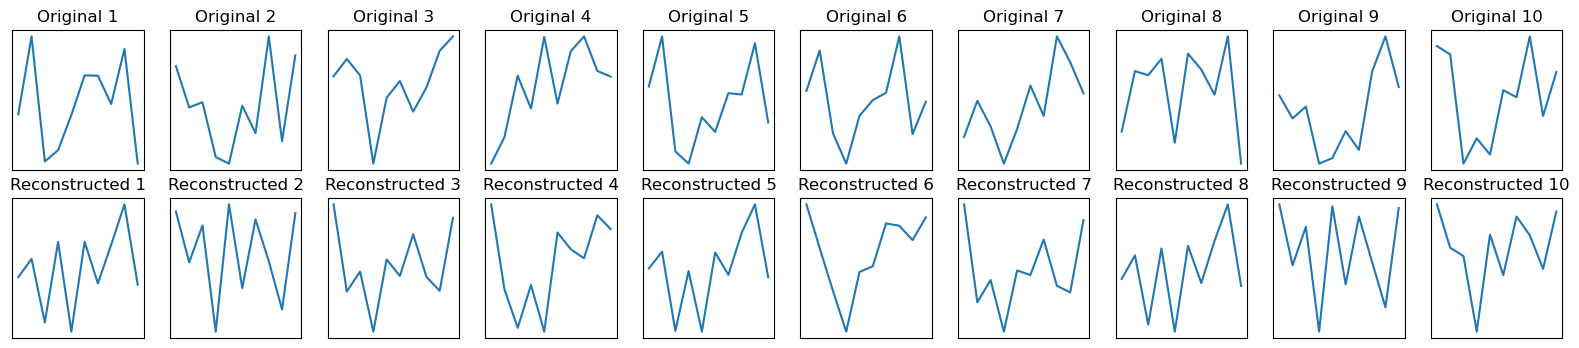

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Step 1: Generate synthetic data (tabular)
X, _ = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Step 4: Build a simple Autoencoder using MLPRegressor
autoencoder = MLPRegressor(hidden_layer_sizes=(5,), activation='relu', solver='adam', max_iter=200)

# Fit the model (train the autoencoder to learn the reconstruction)
autoencoder.fit(X_train, X_train)

# Step 5: Evaluate the reconstruction (mean squared error)
reconstructed = autoencoder.predict(X_test)
mse = mean_squared_error(X_test, reconstructed)
print(f'Mean Squared Error (MSE) of reconstruction: {mse:.4f}')

# Step 6: Visualizing some of the reconstructed data vs original data
n = 10  # number of samples to display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.plot(X_test[i])
    plt.title(f"Original {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(reconstructed[i])
    plt.title(f"Reconstructed {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [23]:
import numpy as np
import tensorflow as tf
from scipy.linalg import sqrtm
from sklearn.preprocessing import normalize
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
import os
from PIL import Image

# Function to load images
def load_images(image_dir, image_size=(299, 299)):
    images = []
    for filename in os.listdir(image_dir):
        img_path = os.path.join(image_dir, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img = np.array(img) / 255.0  # Normalize the image
            images.append(img)
    return np.array(images)

# Inception Score Function
def inception_score(images, splits=10):
    # Load the InceptionV3 model pre-trained on ImageNet data
    model = InceptionV3(include_top=True, weights='imagenet')
    
    # Predict the class probabilities of the images
    preds = model.predict(images)
    
    # Compute Inception Score
    scores = []
    n = len(images)
    split_size = n // splits
    for i in range(splits):
        part = preds[i * split_size: (i + 1) * split_size]
        kl_divergence = part * (np.log(part) - np.log(np.mean(part, axis=0)))
        scores.append(np.exp(np.mean(np.sum(kl_divergence, axis=1))))
    
    return np.mean(scores), np.std(scores)

# FID Score Function
def calculate_fid(real_images, generated_images):
    # Load InceptionV3 model without the top layer for feature extraction
    model = InceptionV3(include_top=False, weights='imagenet', pooling='avg')
    
    # Preprocess images for InceptionV3
    real_images = tf.image.resize(real_images, (299, 299))
    real_images = tf.keras.applications.inception_v3.preprocess_input(real_images)
    
    generated_images = tf.image.resize(generated_images, (299, 299))
    generated_images = tf.keras.applications.inception_v3.preprocess_input(generated_images)
    
    # Get the features from the InceptionV3 model
    real_features = model.predict(real_images)
    generated_features = model.predict(generated_images)
    
    # Calculate the mean and covariance of the real and generated feature vectors
    mu_real, sigma_real = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    mu_gen, sigma_gen = np.mean(generated_features, axis=0), np.cov(generated_features, rowvar=False)
    
    # Calculate the Fréchet Distance (FID)
    diff = mu_real - mu_gen
    covmean = sqrtm(sigma_real.dot(sigma_gen))
    
    # Numerical stability fix
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    
    fid = np.sum(diff**2) + np.trace(sigma_real + sigma_gen - 2 * covmean)
    return fid

# Example usage:
if __name__ == "__main__":
    # Paths to directories containing real and generated images
    real_image_dir = 'path_to_real_images'
    generated_image_dir = 'path_to_generated_images'
    
    # Load images
    real_images = load_images(real_image_dir)
    generated_images = load_images(generated_image_dir)
    
    # Ensure the image arrays are in the correct format
    real_images = np.array(real_images)
    generated_images = np.array(generated_images)
    
    # Calculate Inception Score
    mean_is, std_is = inception_score(generated_images)
    print(f"Inception Score: {mean_is:.4f} ± {std_is:.4f}")
    
    # Calculate FID Score
    fid_score = calculate_fid(real_images, generated_images)
    print(f"FID Score: {fid_score:.4f}")


ModuleNotFoundError: No module named 'tensorflow'

In [24]:
import numpy as np
import torch
from torch import nn
from torchvision import models, transforms
from torchvision.utils import save_image
from scipy.linalg import sqrtm
import os
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from scipy.stats import entropy

# Load images function
def load_images(image_dir, image_size=(299, 299)):
    images = []
    for filename in os.listdir(image_dir):
        img_path = os.path.join(image_dir, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img = np.array(img) / 255.0  # Normalize the image
            images.append(img)
    return np.array(images)

# Inception Score Calculation
def inception_score(images, splits=10):
    # Load the InceptionV3 model pre-trained on ImageNet
    model = models.inception_v3(pretrained=True, transform_input=False)
    model.eval()
    
    # Apply required transforms to the images
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Apply transformation and prepare the images
    images = torch.stack([preprocess(Image.fromarray((img * 255).astype(np.uint8))) for img in images])
    
    # Predict the class probabilities of the images
    with torch.no_grad():
        preds = model(images)
    
    # Compute Inception Score
    scores = []
    n = len(images)
    split_size = n // splits
    for i in range(splits):
        part = preds[i * split_size: (i + 1) * split_size]
        kl_divergence = part * (torch.log(part) - torch.log(torch.mean(part, dim=0)))
        scores.append(torch.exp(torch.mean(torch.sum(kl_divergence, dim=1))).item())
    
    return np.mean(scores), np.std(scores)

# FID Calculation
def calculate_fid(real_images, generated_images):
    # Load InceptionV3 model (without the top layer)
    model = models.inception_v3(pretrained=True, transform_input=False)
    model.eval()
    
    # Preprocess images for InceptionV3
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    real_images = torch.stack([preprocess(Image.fromarray((img * 255).astype(np.uint8))) for img in real_images])
    generated_images = torch.stack([preprocess(Image.fromarray((img * 255).astype(np.uint8))) for img in generated_images])
    
    # Get the feature vectors of the real and generated images
    def get_features(images):
        with torch.no_grad():
            features = model(images)
        return features.numpy()
    
    real_features = get_features(real_images)
    generated_features = get_features(generated_images)
    
    # Calculate the mean and covariance of the real and generated feature vectors
    mu_real, sigma_real = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    mu_gen, sigma_gen = np.mean(generated_features, axis=0), np.cov(generated_features, rowvar=False)
    
    # Calculate the Fréchet Distance (FID)
    diff = mu_real - mu_gen
    covmean = sqrtm(sigma_real.dot(sigma_gen))
    
    # Numerical stability fix
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    
    fid = np.sum(diff**2) + np.trace(sigma_real + sigma_gen - 2 * covmean)
    return fid

# Example usage
if __name__ == "__main__":
    # Paths to directories containing real and generated images
    real_image_dir = 'path_to_real_images'  # Specify path to real images
    generated_image_dir = 'path_to_generated_images'  # Specify path to generated images
    
    # Load images
    real_images = load_images(real_image_dir)
    generated_images = load_images(generated_image_dir)
    
    # Ensure the image arrays are in the correct format
    real_images = np.array(real_images)
    generated_images = np.array(generated_images)
    
    # Calculate Inception Score
    mean_is, std_is = inception_score(generated_images)
    print(f"Inception Score: {mean_is:.4f} ± {std_is:.4f}")
    
    # Calculate FID Score
    fid_score = calculate_fid(real_images, generated_images)
    print(f"FID Score: {fid_score:.4f}")


ModuleNotFoundError: No module named 'torch'

In [25]:
import numpy as np
import torch
from torchvision import models, transforms
from torch.utils.data import DataLoader
from PIL import Image
from scipy.linalg import sqrtm
import os

# Preprocessing for InceptionV3
preprocess = transforms.Compose([
    transforms.Resize(299),  # InceptionV3 expects input of 299x299
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the InceptionV3 model
inception_model = models.inception_v3(pretrained=True, transform_input=False)
inception_model.eval()

def load_images(image_dir):
    """
    Load images from a directory and preprocess them.
    """
    images = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path).convert('RGB')
            img = preprocess(img)
            images.append(img)
    return torch.stack(images)

def calculate_inception_score(images, splits=10):
    """
    Calculate the Inception Score for the given images.
    """
    # Make sure the images are in the correct shape and use a batch size of 32
    with torch.no_grad():
        preds = inception_model(images)

    # Calculate the Inception Score
    scores = []
    n = len(images)
    split_size = n // splits
    for i in range(splits):
        part = preds[i * split_size:(i + 1) * split_size]
        kl_divergence = part * (torch.log(part) - torch.log(torch.mean(part, dim=0)))
        scores.append(torch.exp(torch.mean(torch.sum(kl_divergence, dim=1))).item())

    return np.mean(scores), np.std(scores)

def calculate_fid(real_images, generated_images):
    """
    Calculate the Fréchet Inception Distance (FID) between real and generated images.
    """
    # Extract features using InceptionV3
    def get_features(images):
        with torch.no_grad():
            features = inception_model(images)
        return features

    real_features = get_features(real_images)
    generated_features = get_features(generated_images)

    # Calculate the mean and covariance of the real and generated feature vectors
    mu_real, sigma_real = np.mean(real_features.numpy(), axis=0), np.cov(real_features.numpy(), rowvar=False)
    mu_gen, sigma_gen = np.mean(generated_features.numpy(), axis=0), np.cov(generated_features.numpy(), rowvar=False)

    # Calculate the Fréchet Distance (FID)
    diff = mu_real - mu_gen
    covmean = sqrtm(sigma_real.dot(sigma_gen))

    # Numerical stability fix
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = np.sum(diff**2) + np.trace(sigma_real + sigma_gen - 2 * covmean)
    return fid

# Example usage
if __name__ == "__main__":
    # Specify the directory paths to the real and generated images
    real_image_dir = "path_to_real_images"  # Replace with your real images directory
    generated_image_dir = "path_to_generated_images"  # Replace with your generated images directory

    # Load images
    real_images = load_images(real_image_dir)
    generated_images = load_images(generated_image_dir)

    # Calculate Inception Score
    mean_is, std_is = calculate_inception_score(generated_images)
    print(f"Inception Score: {mean_is:.4f} ± {std_is:.4f}")

    # Calculate FID
    fid_score = calculate_fid(real_images, generated_images)
    print(f"FID Score: {fid_score:.4f}")


ModuleNotFoundError: No module named 'torch'

In [26]:
import torch
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.models import inception_v3
import torch.nn.functional as F
from scipy.stats import entropy
from PIL import Image

# Define the InceptionV3 model from torchvision
inception_model = inception_v3(pretrained=True, transform_input=False)
inception_model.eval()

# Define the image transform function
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize to 299x299 for InceptionV3 input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization for ImageNet
])

# Inception Score Calculation
def calculate_inception_score(images, splits=10):
    def get_predicted_classes(images):
        with torch.no_grad():
            preds = inception_model(images)
            preds = F.softmax(preds, dim=1)
            return preds

    # Split the images into 'splits' subsets
    N = len(images)
    split_size = N // splits
    scores = []

    for i in range(splits):
        part = images[i * split_size: (i + 1) * split_size]
        preds = get_predicted_classes(part)

        # Calculate entropy over each image's predicted class probabilities
        p_yx = preds.cpu().numpy()  # Shape: [batch_size, num_classes]
        p_y = np.mean(p_yx, axis=0)  # Mean over the batch

        # Calculate the entropy between p_yx and p_y for each image in the batch
        kl_div = np.sum(p_yx * (np.log(p_yx) - np.log(p_y)), axis=1)
        kl_div_mean = np.mean(kl_div)

        score = np.exp(kl_div_mean)
        scores.append(score)

    # Return the mean and standard deviation of the scores
    return np.mean(scores), np.std(scores)

# Example: Generating random images (replace this with your model's generated images)
# In this case, we're using random noise as an example
def generate_fake_images(batch_size=64, image_size=(3, 299, 299)):
    # Generate random noise for the sake of example
    return torch.randn(batch_size, *image_size)

# Example of generating fake images
fake_images = generate_fake_images()

# Preprocess the generated images
processed_images = torch.stack([transform(Image.fromarray((fake_img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))) for fake_img in fake_images])

# Calculate Inception Score
mean_is, std_is = calculate_inception_score(processed_images)
print(f"Inception Score: {mean_is:.4f} ± {std_is:.4f}")


ModuleNotFoundError: No module named 'torch'

In [27]:
pip install torch torchvision tensorflow scipy numpy Pillow
import torch
import numpy as np
from torchvision import transforms, models
import torch.nn.functional as F
from scipy.stats import entropy
from scipy.linalg import sqrtm
from sklearn.preprocessing import StandardScaler
from PIL import Image
import os

# Load InceptionV3 model
inception_model = models.inception_v3(pretrained=True, transform_input=False)
inception_model.eval()

# Image Preprocessing
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize to 299x299 for InceptionV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize for ImageNet
])

def calculate_inception_score(images, splits=10):
    """Calculates the Inception Score of a set of images."""
    def get_predicted_classes(images):
        with torch.no_grad():
            preds = inception_model(images)
            preds = F.softmax(preds, dim=1)
            return preds

    N = len(images)
    split_size = N // splits
    scores = []

    for i in range(splits):
        part = images[i * split_size: (i + 1) * split_size]
        preds = get_predicted_classes(part)

        p_yx = preds.cpu().numpy()  # Shape: [batch_size, num_classes]
        p_y = np.mean(p_yx, axis=0)  # Mean over the batch

        # Calculate KL divergence for each image in the batch
        kl_div = np.sum(p_yx * (np.log(p_yx) - np.log(p_y)), axis=1)
        kl_div_mean = np.mean(kl_div)

        score = np.exp(kl_div_mean)
        scores.append(score)

    return np.mean(scores), np.std(scores)

def calculate_fid(real_images, generated_images, batch_size=50):
    """Calculates the FID score between real and generated images."""
    def get_features(images):
        inception_model.eval()
        with torch.no_grad():
            features = []
            for i in range(0, len(images), batch_size):
                batch = images[i:i + batch_size]
                preds = inception_model(batch)
                features.append(preds.cpu().numpy())
            return np.concatenate(features, axis=0)

    real_features = get_features(real_images)
    generated_features = get_features(generated_images)

    # Compute mean and covariance of real and generated features
    real_mu, real_sigma = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    gen_mu, gen_sigma = np.mean(generated_features, axis=0), np.cov(generated_features, rowvar=False)

    # Calculate FID score using Fréchet distance
    diff = real_mu - gen_mu
    covmean = sqrtm(real_sigma.dot(gen_sigma))
    fid = np.sum(diff ** 2) + np.trace(real_sigma + gen_sigma - 2 * covmean)

    return fid

def generate_fake_images(batch_size=64, image_size=(3, 299, 299)):
    """Generate fake images using random noise (as an example)."""
    return torch.randn(batch_size, *image_size)

# Example: Generate random images (replace this with your GAN's output)
fake_images = generate_fake_images(batch_size=50)

# Transform the images to the correct format (299x299 for InceptionV3)
processed_fake_images = torch.stack([transform(Image.fromarray((fake_img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))) for fake_img in fake_images])

# Load real images (for FID, you need a set of real images)
# In this case, we simulate it by using random noise as "real" images for the example.
real_images = generate_fake_images(batch_size=50)  # Simulated real images

# Calculate Inception Score
mean_is, std_is = calculate_inception_score(processed_fake_images)
print(f"Inception Score: {mean_is:.4f} ± {std_is:.4f}")

# Calculate FID score
fid_score = calculate_fid(real_images, processed_fake_images)
print(f"FID Score: {fid_score:.4f}")


SyntaxError: invalid syntax (3780066218.py, line 1)

In [28]:
pip install torch torchvision tensorflow scipy numpy Pillow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/203.0 MB 2.8 MB/s eta 0:01:12
   ---------------------------------------- 0.5/203.0 MB 2.8 MB/s eta 0:01:12
   ---------------------------------------- 0.5/203.0 MB 2.8 MB/s eta 0:01:12
   ---------------------------------------- 1.0/203.0 MB 1.0 MB/s eta 0:03:13
   ---------------------------------------- 1.6/203.0 MB 1.4 MB/s eta 0:02:25
   ---------------------------------------- 2.4/203.0 MB 1.8 MB/s eta 0:01:54
    --------------------------------------- 3.4/203.0 MB 2.2 MB/s eta 0:01:32
    ----------------

In [29]:
import torch
import numpy as np
from torchvision import transforms, models
import torch.nn.functional as F
from scipy.stats import entropy
from scipy.linalg import sqrtm
from sklearn.preprocessing import StandardScaler
from PIL import Image
import os

# Load InceptionV3 model
inception_model = models.inception_v3(pretrained=True, transform_input=False)
inception_model.eval()

# Image Preprocessing
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize to 299x299 for InceptionV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize for ImageNet
])

def calculate_inception_score(images, splits=10):
    """Calculates the Inception Score of a set of images."""
    def get_predicted_classes(images):
        with torch.no_grad():
            preds = inception_model(images)
            preds = F.softmax(preds, dim=1)
            return preds

    N = len(images)
    split_size = N // splits
    scores = []

    for i in range(splits):
        part = images[i * split_size: (i + 1) * split_size]
        preds = get_predicted_classes(part)

        p_yx = preds.cpu().numpy()  # Shape: [batch_size, num_classes]
        p_y = np.mean(p_yx, axis=0)  # Mean over the batch

        # Calculate KL divergence for each image in the batch
        kl_div = np.sum(p_yx * (np.log(p_yx) - np.log(p_y)), axis=1)
        kl_div_mean = np.mean(kl_div)

        score = np.exp(kl_div_mean)
        scores.append(score)

    return np.mean(scores), np.std(scores)

def calculate_fid(real_images, generated_images, batch_size=50):
    """Calculates the FID score between real and generated images."""
    def get_features(images):
        inception_model.eval()
        with torch.no_grad():
            features = []
            for i in range(0, len(images), batch_size):
                batch = images[i:i + batch_size]
                preds = inception_model(batch)
                features.append(preds.cpu().numpy())
            return np.concatenate(features, axis=0)

    real_features = get_features(real_images)
    generated_features = get_features(generated_images)

    # Compute mean and covariance of real and generated features
    real_mu, real_sigma = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    gen_mu, gen_sigma = np.mean(generated_features, axis=0), np.cov(generated_features, rowvar=False)

    # Calculate FID score using Fréchet distance
    diff = real_mu - gen_mu
    covmean = sqrtm(real_sigma.dot(gen_sigma))
    fid = np.sum(diff ** 2) + np.trace(real_sigma + gen_sigma - 2 * covmean)

    return fid

def generate_fake_images(batch_size=64, image_size=(3, 299, 299)):
    """Generate fake images using random noise (as an example)."""
    return torch.randn(batch_size, *image_size)

# Example: Generate random images (replace this with your GAN's output)
fake_images = generate_fake_images(batch_size=50)

# Transform the images to the correct format (299x299 for InceptionV3)
processed_fake_images = torch.stack([transform(Image.fromarray((fake_img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))) for fake_img in fake_images])

# Load real images (for FID, you need a set of real images)
# In this case, we simulate it by using random noise as "real" images for the example.
real_images = generate_fake_images(batch_size=50)  # Simulated real images

# Calculate Inception Score
mean_is, std_is = calculate_inception_score(processed_fake_images)
print(f"Inception Score: {mean_is:.4f} ± {std_is:.4f}")

# Calculate FID score
fid_score = calculate_fid(real_images, processed_fake_images)
print(f"FID Score: {fid_score:.4f}")


C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:13<00:00, 8.26MB/s] 


Inception Score: 1.0473 ± 0.0086
FID Score: 97.5029-0.0000j


In [30]:
import torch
import numpy as np
from torchvision import transforms, models
import torch.nn.functional as F
from scipy.stats import entropy
from scipy.linalg import sqrtm
from sklearn.preprocessing import StandardScaler
from PIL import Image
import os

# Load InceptionV3 model
inception_model = models.inception_v3(pretrained=True, transform_input=False)
inception_model.eval()

# Image Preprocessing
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize to 299x299 for InceptionV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize for ImageNet
])

def calculate_inception_score(images, splits=10):
    """Calculates the Inception Score of a set of images."""
    def get_predicted_classes(images):
        with torch.no_grad():
            preds = inception_model(images)
            preds = F.softmax(preds, dim=1)
            return preds

    N = len(images)
    split_size = N // splits
    scores = []

    for i in range(splits):
        part = images[i * split_size: (i + 1) * split_size]
        preds = get_predicted_classes(part)

        p_yx = preds.cpu().numpy()  # Shape: [batch_size, num_classes]
        p_y = np.mean(p_yx, axis=0)  # Mean over the batch

        # Calculate KL divergence for each image in the batch
        kl_div = np.sum(p_yx * (np.log(p_yx) - np.log(p_y)), axis=1)
        kl_div_mean = np.mean(kl_div)

        score = np.exp(kl_div_mean)
        scores.append(score)

    return np.mean(scores), np.std(scores)

def calculate_fid(real_images, generated_images, batch_size=50):
    """Calculates the FID score between real and generated images."""
    def get_features(images):
        inception_model.eval()
        with torch.no_grad():
            features = []
            for i in range(0, len(images), batch_size):
                batch = images[i:i + batch_size]
                preds = inception_model(batch)
                features.append(preds.cpu().numpy())
            return np.concatenate(features, axis=0)

    real_features = get_features(real_images)
    generated_features = get_features(generated_images)

    # Compute mean and covariance of real and generated features
    real_mu, real_sigma = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    gen_mu, gen_sigma = np.mean(generated_features, axis=0), np.cov(generated_features, rowvar=False)

    # Calculate FID score using Fréchet distance
    diff = real_mu - gen_mu
    covmean = sqrtm(real_sigma.dot(gen_sigma))
    fid = np.sum(diff ** 2) + np.trace(real_sigma + gen_sigma - 2 * covmean)

    return fid

def generate_fake_images(batch_size=64, image_size=(3, 299, 299)):
    """Generate fake images using random noise (as an example)."""
    return torch.randn(batch_size, *image_size)

# Example: Generate random images (replace this with your GAN's output)
fake_images = generate_fake_images(batch_size=50)

# Transform the images to the correct format (299x299 for InceptionV3)
processed_fake_images = torch.stack([transform(Image.fromarray((fake_img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))) for fake_img in fake_images])

# Load real images (for FID, you need a set of real images)
# In this case, we simulate it by using random noise as "real" images for the example.
real_images = generate_fake_images(batch_size=50)  # Simulated real images

# Calculate Inception Score
mean_is, std_is = calculate_inception_score(processed_fake_images)
print(f"Inception Score: {mean_is:.4f} ± {std_is:.4f}")

# Calculate FID score
fid_score = calculate_fid(real_images, processed_fake_images)
print(f"FID Score: {fid_score:.4f}")


Inception Score: 1.0629 ± 0.0163
FID Score: 104.8902-0.0000j


In [32]:
import torch
import numpy as np
from torchvision import transforms, models
import torch.nn.functional as F
from scipy.stats import entropy
from scipy.linalg import sqrtm
from sklearn.preprocessing import StandardScaler
from PIL import Image
import os

# Load InceptionV3 model
inception_model = models.inception_v3(pretrained=True, transform_input=False)
inception_model.eval()

# Image Preprocessing
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize to 299x299 for InceptionV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize for ImageNet
])

def calculate_inception_score(images, splits=10):
    """Calculates the Inception Score of a set of images."""
    def get_predicted_classes(images):
        with torch.no_grad():
            preds = inception_model(images)
            preds = F.softmax(preds, dim=1)
            return preds

    N = len(images)
    split_size = N // splits
    scores = []

    for i in range(splits):
        part = images[i * split_size: (i + 1) * split_size]
        preds = get_predicted_classes(part)

        p_yx = preds.cpu().numpy()  # Shape: [batch_size, num_classes]
        p_y = np.mean(p_yx, axis=0)  # Mean over the batch

        # Calculate KL divergence for each image in the batch
        kl_div = np.sum(p_yx * (np.log(p_yx) - np.log(p_y)), axis=1)
        kl_div_mean = np.mean(kl_div)

        score = np.exp(kl_div_mean)
        scores.append(score)

    return np.mean(scores), np.std(scores)

def calculate_fid(real_images, generated_images, batch_size=50):
    """Calculates the FID score between real and generated images."""
    def get_features(images):
        inception_model.eval()
        with torch.no_grad():
            features = []
            for i in range(0, len(images), batch_size):
                batch = images[i:i + batch_size]
                preds = inception_model(batch)
                features.append(preds.cpu().numpy())
            return np.concatenate(features, axis=0)

    real_features = get_features(real_images)
    generated_features = get_features(generated_images)

    # Compute mean and covariance of real and generated features
    real_mu, real_sigma = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    gen_mu, gen_sigma = np.mean(generated_features, axis=0), np.cov(generated_features, rowvar=False)

    # Calculate FID score using Fréchet distance
    diff = real_mu - gen_mu
    covmean = sqrtm(real_sigma.dot(gen_sigma))
    fid = np.sum(diff ** 2) + np.trace(real_sigma + gen_sigma - 2 * covmean)

    return fid

def generate_fake_images(batch_size=64, image_size=(3, 299, 299)):
    """Generate fake images using random noise (as an example)."""
    return torch.randn(batch_size, *image_size)

# Example: Generate random images (replace this with your GAN's output)
fake_images = generate_fake_images(batch_size=50)

# Transform the images to the correct format (299x299 for InceptionV3)
processed_fake_images = torch.stack([transform(Image.fromarray((fake_img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))) for fake_img in fake_images])

# Load real images (for FID, you need a set of real images)
# In this case, we simulate it by using random noise as "real" images for the example.
real_images = generate_fake_images(batch_size=50)  # Simulated real images

# Calculate Inception Score
mean_is, std_is = calculate_inception_score(processed_fake_images)
print(f"Inception Score: {mean_is:.4f} ± {std_is:.4f}")

# Calculate FID score
fid_score = calculate_fid(real_images, processed_fake_images)
print(f"FID Score: {fid_score:.4f}")


Inception Score: 1.0496 ± 0.0124
FID Score: 103.3855-0.0000j
